Libraries

In [2]:
import numpy as np
import random
import math, random
import matplotlib.pyplot as plt

tai15a

In [3]:
# Manually parse the matrices for the new problem with size 15 (Tai15a style)
distance_matrix_15 = np.array([
    [0, 36, 53, 37, 26, 87, 76, 91, 13, 29, 11, 77, 32, 87, 67],
    [36, 0, 94, 79, 2, 10, 99, 56, 70, 99, 60, 4, 56, 2, 60],
    [53, 94, 0, 72, 74, 46, 13, 20, 86, 4, 77, 15, 89, 48, 14],
    [37, 79, 72, 0, 89, 44, 59, 22, 57, 63, 6, 0, 62, 41, 62],
    [26, 2, 74, 89, 0, 46, 25, 75, 76, 40, 66, 58, 30, 68, 78],
    [87, 10, 46, 44, 46, 0, 91, 13, 59, 49, 85, 84, 8, 38, 41],
    [76, 99, 13, 59, 25, 91, 0, 56, 39, 53, 77, 50, 30, 58, 55],
    [91, 56, 20, 22, 75, 13, 56, 0, 19, 85, 52, 34, 53, 40, 69],
    [13, 70, 86, 57, 76, 59, 39, 19, 0, 12, 85, 72, 7, 49, 46],
    [29, 99, 4, 63, 40, 49, 53, 85, 12, 0, 87, 58, 17, 68, 27],
    [11, 60, 77, 6, 66, 85, 77, 52, 85, 87, 0, 21, 6, 67, 26],
    [77, 4, 15, 0, 58, 84, 50, 34, 72, 58, 21, 0, 82, 44, 35],
    [32, 56, 89, 62, 30, 8, 30, 53, 7, 17, 6, 82, 0, 3, 62],
    [87, 2, 48, 41, 68, 38, 58, 40, 49, 68, 67, 44, 3, 0, 8],
    [67, 60, 14, 62, 78, 41, 55, 69, 46, 27, 26, 35, 62, 8, 0]
])

flow_matrix_15 = np.array([
    [0, 21, 95, 82, 56, 41, 6, 25, 10, 4, 63, 6, 44, 40, 75],
    [21, 0, 79, 0, 89, 35, 9, 1, 85, 84, 12, 0, 26, 91, 11],
    [95, 79, 0, 35, 82, 26, 69, 56, 86, 45, 91, 59, 18, 76, 39],
    [82, 0, 35, 0, 18, 57, 36, 61, 36, 21, 71, 11, 29, 82, 82],
    [56, 89, 82, 18, 0, 6, 71, 8, 77, 74, 30, 89, 76, 76, 40],
    [41, 35, 26, 57, 6, 0, 93, 56, 1, 50, 4, 36, 27, 85, 2],
    [6, 9, 69, 36, 71, 93, 0, 1, 15, 11, 35, 11, 20, 21, 61],
    [25, 1, 56, 61, 8, 56, 1, 0, 80, 58, 21, 76, 72, 44, 85],
    [10, 85, 86, 36, 77, 1, 15, 80, 0, 94, 90, 51, 3, 48, 29],
    [4, 84, 45, 21, 74, 50, 11, 58, 94, 0, 90, 66, 41, 15, 83],
    [63, 12, 91, 71, 30, 4, 35, 21, 90, 90, 0, 96, 74, 45, 65],
    [6, 0, 59, 11, 89, 36, 11, 76, 51, 66, 96, 0, 40, 54, 83],
    [44, 26, 18, 29, 76, 27, 20, 72, 3, 41, 74, 40, 0, 14, 71],
    [40, 91, 76, 82, 76, 85, 21, 44, 48, 15, 45, 54, 14, 0, 77],
    [75, 11, 39, 82, 40, 2, 61, 85, 29, 83, 65, 83, 71, 77, 0]
])

distance_matrix_15.shape, flow_matrix_15.shape


((15, 15), (15, 15))

Cost Function

In [4]:
# --- Cost Function ---
def calculate_cost(solution, flow, dist):
    return sum(flow[i][j] * dist[solution[i]][solution[j]] for i in range(len(solution)) for j in range(len(solution)))

Neighbouring Functions

In [5]:
# --- Neighbor Functions ---
def neighbor_swap(s):
    s = s.copy()
    i, j = random.sample(range(len(s)), 2)
    s[i], s[j] = s[j], s[i]
    return s

def neighbor_insert(s):
    s = s.copy()
    i, j = random.sample(range(len(s)), 2)
    elem = s.pop(i)
    s.insert(j, elem)
    return s

def neighbor_reverse(s):
    s = s.copy()
    i, j = sorted(random.sample(range(len(s)), 2))
    s[i:j+1] = reversed(s[i:j+1])
    return s

def neighbor_three_swap(s):
    s = s.copy()
    i, j, k = sorted(random.sample(range(len(s)), 3))
    s[i], s[j], s[k] = s[k], s[i], s[j]
    return s


Roulette Wheel Selection Logic

In [6]:
neighbor_functions = [neighbor_swap, neighbor_insert, neighbor_reverse, neighbor_three_swap]
scores = [1.0 for _ in neighbor_functions]

# --- Roulette Wheel Selection ---
def roulette_wheel_select(weights):
    total = sum(weights)
    pick = random.uniform(0, total)
    current = 0
    for i, weight in enumerate(weights):
        current += weight
        if current > pick:
            return i
    return len(weights) - 1

Enhanced SA

In [7]:
def enhanced_simulated_annealing(flow, dist, T0=100000, alpha=0.97, beta=1, Mk=20, max_temp_loops=1000, cooling='default'):
    n = len(flow)
    current_solution = list(range(n))
    random.shuffle(current_solution)
    current_cost = calculate_cost(current_solution, flow, dist)
    best_solution = current_solution[:]
    best_cost = current_cost
    T = T0
    k = 1  # start from 1 to avoid log(0)

    convergence = []  # To store best cost at each temperature step

    while k <= max_temp_loops:
        m = 0
        while m < Mk:
            idx = roulette_wheel_select(scores)
            neighbor = neighbor_functions[idx]
            candidate = neighbor(current_solution)
            candidate_cost = calculate_cost(candidate, flow, dist)

            delta = candidate_cost - current_cost
            if delta <= 0 or random.random() < math.exp(-delta / T):
                current_solution = candidate
                current_cost = candidate_cost
                scores[idx] += 1
                if current_cost < best_cost:
                    best_solution = current_solution[:]
                    best_cost = current_cost
            else:
                scores[idx] *= 0.99
            m += 1

        convergence.append(best_cost)  # Track the best cost at this temperature

        # --- Cooling ---
        if cooling == 'default':
            T *= alpha
        elif cooling == 'linear':
            T -= beta
            T = max(T, 1e-8)
        elif cooling == 'logarithmic':
            T = T0 / math.log(k + 1)
        else:
            raise ValueError(f"Unknown cooling method: {cooling}")

        k += 1

    return best_solution, best_cost, convergence


Simple SA

In [8]:
def simulated_annealing_single_neighbor(flow, dist, T0=100000, alpha=0.97, beta=1,
                                        Mk=20, max_temp_loops=1000, cooling='default'):
    n = len(flow)
    current_solution = list(range(n))
    random.shuffle(current_solution)
    current_cost = calculate_cost(current_solution, flow, dist)

    best_solution = current_solution[:]
    best_cost = current_cost
    T = T0
    k = 1

    convergence = []

    while k <= max_temp_loops:
        for _ in range(Mk):
            candidate = neighbor_insert(current_solution)
            candidate_cost = calculate_cost(candidate, flow, dist)
            delta = candidate_cost - current_cost

            if delta <= 0 or random.random() < math.exp(-delta / T):
                current_solution = candidate
                current_cost = candidate_cost
                if current_cost < best_cost:
                    best_solution = current_solution[:]
                    best_cost = current_cost

        convergence.append(best_cost)

        # Cooling
        if cooling == 'default':
            T *= alpha
        elif cooling == 'linear':
            T -= beta
            T = max(T, 1e-8)
        elif cooling == 'logarithmic':
            T = T0 / math.log(k + 1)
        else:
            raise ValueError(f"Unknown cooling method: {cooling}")

        k += 1

    return best_solution, best_cost, convergence

Main

Enhanced SA - Run 1: Best Cost = 401,372
Single Neighbor SA - Run 1: Best Cost = 425,724
Enhanced SA - Run 2: Best Cost = 406,178
Single Neighbor SA - Run 2: Best Cost = 414,124
Enhanced SA - Run 3: Best Cost = 411,672
Single Neighbor SA - Run 3: Best Cost = 424,754
Enhanced SA - Run 4: Best Cost = 412,322
Single Neighbor SA - Run 4: Best Cost = 409,716
Enhanced SA - Run 5: Best Cost = 415,452
Single Neighbor SA - Run 5: Best Cost = 430,458
Enhanced SA - Run 6: Best Cost = 408,170
Single Neighbor SA - Run 6: Best Cost = 428,628
Enhanced SA - Run 7: Best Cost = 414,182
Single Neighbor SA - Run 7: Best Cost = 421,686
Enhanced SA - Run 8: Best Cost = 393,802
Single Neighbor SA - Run 8: Best Cost = 421,876
Enhanced SA - Run 9: Best Cost = 403,458
Single Neighbor SA - Run 9: Best Cost = 416,768
Enhanced SA - Run 10: Best Cost = 392,754
Single Neighbor SA - Run 10: Best Cost = 425,490

=== Summary Table: Enhanced SA ===
Algorithm	R. 1	R. 2	R. 3	R. 4	R. 5	R. 6	R. 7	R. 8	R. 9	R. 10	Average
Enh

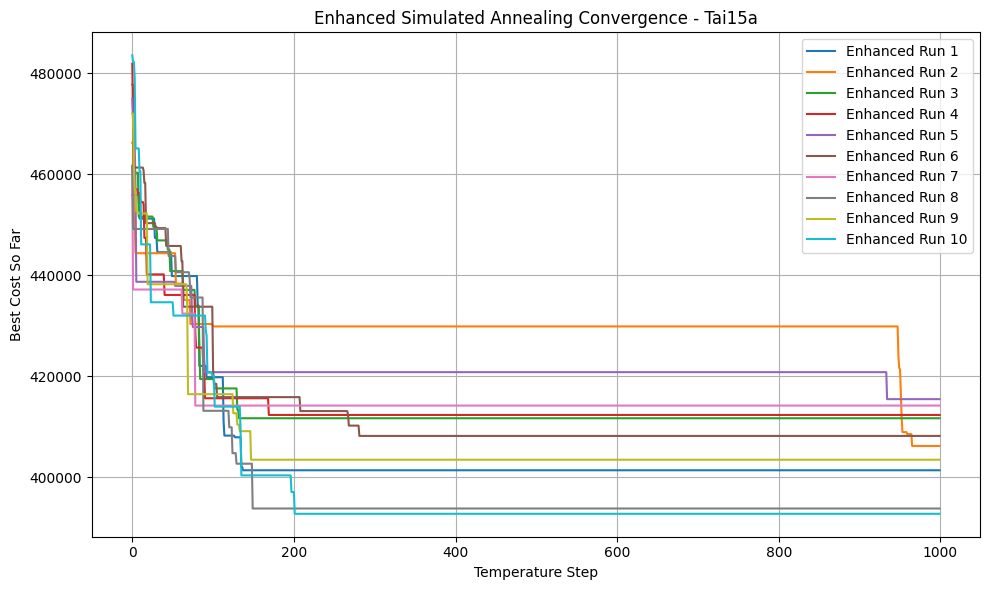

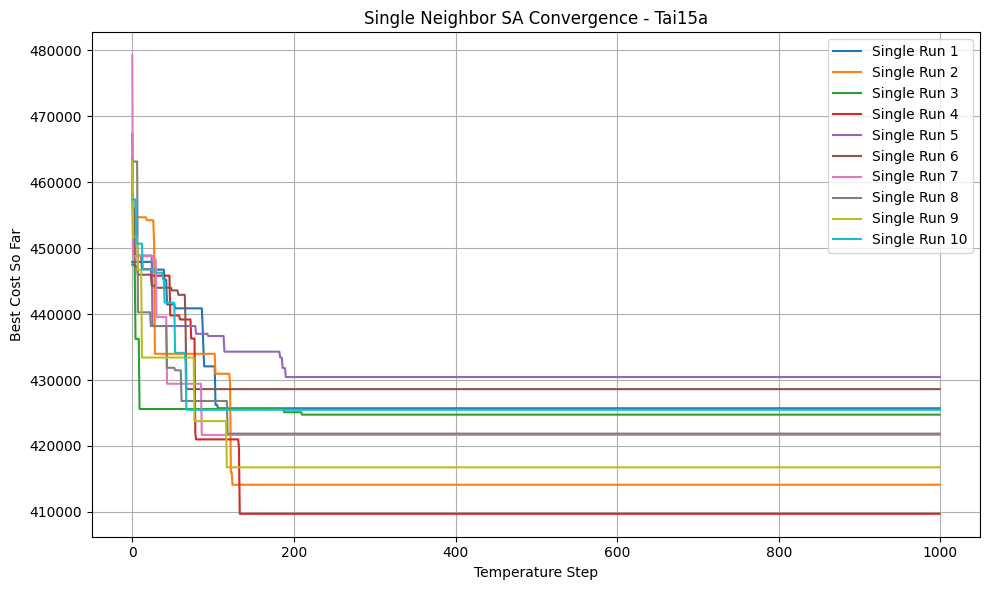

In [11]:
# --- Run the Algorithm 10 Times ---
problem_name = "Tai15a"
problem_size = distance_matrix_15.shape[0]

# Store results separately for both SA variants
results_single = []
results_enhanced = []
convergence_single = []
convergence_enhanced = []

# --- SA Parameters ---
T0 = 100000
alpha = 0.97
beta = 100  # Only used for linear cooling
Mk = 20
max_temp_loops = 1000
cooling_method = 'default'  # Options: 'default', 'linear', 'logarithmic'

# --- Run 10 times for both SA variants ---
for run in range(10):
    # Enhanced SA with multiple neighbors
    sol_e, cost_e, conv_e = enhanced_simulated_annealing(
        flow_matrix_15,
        distance_matrix_15,
        T0=T0,
        alpha=alpha,
        beta=beta,
        Mk=Mk,
        max_temp_loops=max_temp_loops,
        cooling=cooling_method
    )
    results_enhanced.append(cost_e)
    convergence_enhanced.append(conv_e)
    print(f"Enhanced SA - Run {run+1}: Best Cost = {cost_e:,}")

    # Standard SA with single neighbor
    sol_s, cost_s, conv_s = simulated_annealing_single_neighbor(
        flow_matrix_15,
        distance_matrix_15,
        T0=T0,
        alpha=alpha,
        beta=beta,
        Mk=Mk,
        max_temp_loops=max_temp_loops,
        cooling=cooling_method
    )
    results_single.append(cost_s)
    convergence_single.append(conv_s)
    print(f"Single Neighbor SA - Run {run+1}: Best Cost = {cost_s:,}")

# --- Summary Table Function ---
def print_summary_table(name, results):
    average = sum(results) / len(results)
    print(f"\n=== Summary Table: {name} ===")
    print("Algorithm\t" + "\t".join([f"R. {i+1}" for i in range(10)]) + "\tAverage")
    print(f"{name}\t" + "\t".join(f"{r:,}" for r in results) + f"\t{average:,.2f}")

print_summary_table("Enhanced SA", results_enhanced)
print_summary_table("Single Neighbor SA", results_single)

# --- Plot Convergence for Each SA Variant ---
plt.figure(figsize=(10, 6))
for i, conv in enumerate(convergence_enhanced):
    plt.plot(conv, label=f"Enhanced Run {i+1}")
plt.title(f"Enhanced Simulated Annealing Convergence - {problem_name}")
plt.xlabel("Temperature Step")
plt.ylabel("Best Cost So Far")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, conv in enumerate(convergence_single):
    plt.plot(conv, label=f"Single Run {i+1}")
plt.title(f"Single Neighbor SA Convergence - {problem_name}")
plt.xlabel("Temperature Step")
plt.ylabel("Best Cost So Far")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()